In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from preprocess import preprocess

In [2]:
# Find X and y from the dataset
df = pd.read_csv('../dataset/body_level_classification_train.csv')
y = df['Body_Level']
X = df.drop(['Body_Level'], axis=1)

print(X.shape)
print(y.shape)

(1477, 16)
(1477,)


In [3]:
# Random oversample to make the minority class instances equal to the majority class instances
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)

X = pd.DataFrame(X_over, columns=X.columns)
y = y_over

print(X.shape[0])

2720


In [4]:
def countPlot(data=None, x=None, y=None, palette='bright', height=15, title=' ', subtitle=' ', description=' '):
    sns.set(style = 'whitegrid', rc = {'figure.figsize': (20,height)})
    g = sns.countplot(data=data, y=y, x=x, palette=palette)
    g.set_ylabel(' \n\n\n')
    g.set_xlabel(' \n\n\n\n\n')
    g.set_title(f'\n\n\n\n{title}\n\n'.upper(), loc = 'left', fontdict = dict(fontsize = 15, fontweight = 'bold'))
    g.set_yticklabels(
        [tick_label.get_text().title() for tick_label in g.get_yticklabels()],
        fontdict = dict(
            fontsize = 12.5,
            fontweight = 'medium'))
    
    plt.text(s = f'{description}',
             alpha = 0.5,
             x = 0,
             y = -.18,
             verticalalignment = 'baseline',
             horizontalalignment = 'left',
             transform = g.transAxes)
    
    g.bar_label(container = g.containers[0], padding = 10,)
    plt.text(s = ' ', x = 1.08, y = 1, transform = g.transAxes)
    sns.despine()
    return g

def piePlot(data=None, value='Percentage', name='Class', title=' ', subtitle=' ', description=' '):
    data_pie = pd.DataFrame(data.value_counts() / data.shape[0]*100).reset_index()
    data_pie.columns = [name, value]
    fig = px.pie(data_pie, values=value, names=name, title=title)
    fig.update_layout(title=title, title_x=0.48)
    fig.show()

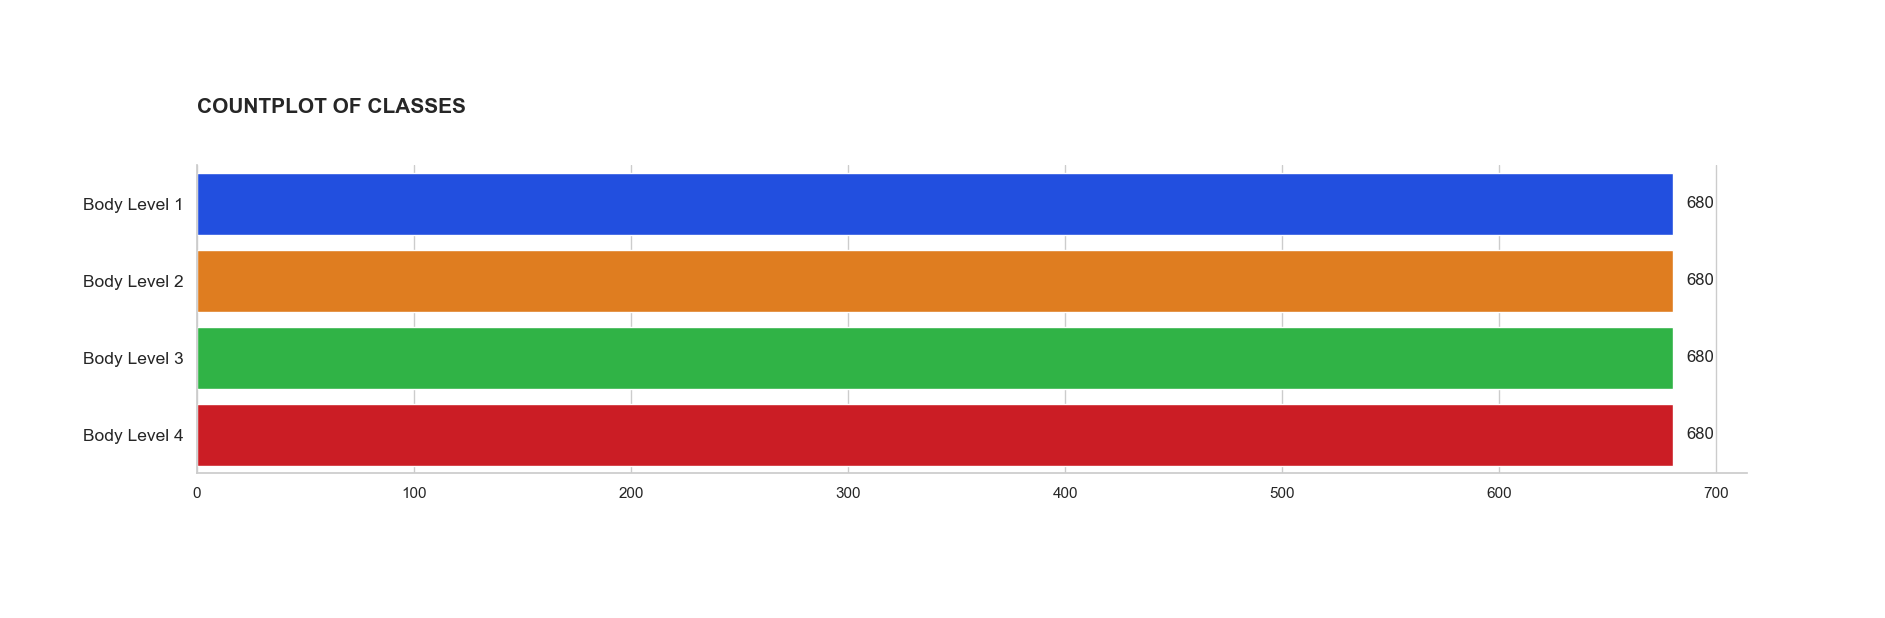

In [5]:
countPlot(y = y, title = 'Countplot of Classes', height = y.nunique())
piePlot(data = y, value = 'Percentage', name = 'Class', title = 'Class Distribution')  

In [6]:
df = preprocess(X, y)
df.head()

,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,...,Phys_Act,Time_E_Dev,Gender_Female,Gender_Male,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking,Body_Level
0,-0.073027,0.296670,-0.916041,1,0.483690,-1.455809,3,0,0.328472,1,...,-0.358625,1.101188,1,0,0,0,0,1,0,1
1,-0.539005,0.514689,-0.793746,1,-0.713691,1.414981,2,0,0.667690,2,...,0.640667,2.051756,0,1,0,0,0,1,0,1
2,-0.873980,0.152409,-0.991566,1,-1.359395,-1.363429,2,0,0.859228,2,...,-0.781959,0.488455,1,0,0,0,0,1,0,1
3,-0.673271,-0.029049,-0.995752,1,-2.134281,-1.473940,2,0,0.571306,2,...,1.000453,0.488455,1,0,0,0,0,1,0,1
4,-0.550840,1.023919,-0.662565,1,0.204684,0.190579,3,0,0.839662,2,...,1.030516,1.181510,0,1,1,0,0,0,0,1


In [7]:
# Save the preprocessed dataset
df.to_csv('../dataset/body_level_classification_train_preprocessed.csv', index=False)